In [3]:
#Author: @michaelbrink
#Org: BalloonBox Inc.

In [1]:
from bs4 import BeautifulSoup
import requests
import json
from html.parser import HTMLParser
import urllib.request
import string
import random
import re
import pandas as pd

In [2]:
#Need a JS enabled web service
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
import selenium.webdriver.chrome.service as service
from selenium.webdriver.chrome.options import Options
import time

In [4]:
options = Options()

In [5]:
options.add_argument("--disable-notifications")

In [6]:
driver = webdriver.Chrome('path',options=options)

In [7]:
URL = "https://fortune.com/fortune500/2020/search/"
driver.get(URL)
content = BeautifulSoup(driver.page_source, 'html.parser')
time.sleep(10) #bypass cloudflare

# Helper Functions

In [8]:
def ceoFounder():
    driver.find_element_by_xpath(
        "//div[@class='input__inputWrapper--3SQdx searchFilters__filter--3igRc input__input--34yMC input__checkbox--1434-']/label[@for='ceofounder']").click()
    time.sleep(5)

In [9]:
def changeTheWorld():
    driver.find_element_by_xpath(
        "//div[@class='input__inputWrapper--3SQdx searchFilters__filter--3igRc input__input--34yMC input__checkbox--1434-']/label[@for='change-the-world-y-n']").click()
    time.sleep(5)

In [10]:
def femaleCEO():
    driver.find_element_by_xpath(
        "//div[@class='input__inputWrapper--3SQdx searchFilters__filter--3igRc input__input--34yMC input__checkbox--1434-']/label[@for='ceowoman']").click()
    time.sleep(5)

In [13]:
def pageTurner():
    driver.find_element_by_xpath("//div[@class='-next']").click()

## Scrape rows of companies data

In [14]:
def contentScraper():
    content = BeautifulSoup(driver.page_source, 'html.parser')
    example = content.findAll('a', attrs={'class':'searchResults__cellWrapper--39MAj'})
    example = [item.text for item in example] #return a list of all singular elements
    example = [example[i:i + 11] for i in range(0, len(example), 11)]
    return(example)

## Creating a nested frame of data

## Loop to scrape

In [5]:
#date range = 2017 - 2020
#row range = 10 - 100
#page range = 1 - 10

outputContent = []

## Pilot model
for year in range(2017, 2021):
    
    URL = "https://fortune.com/fortune500/"+str(year)+"/search/"
    driver.get(URL)
    #increment/update the year
    #driver.find_element_by_link_text(str(year)).click()
    time.sleep(10)
    print ("Year " + str(year) + " active!")
    
    ##Set any desired filters
    #ceoFounder()
    #femalFounder()
    #changeTheworld()
    
    time.sleep(2)
    
    #expand rows to maximum
    driver.find_element_by_xpath("//select[@aria-label='rows per page']/option[@value='100']").click()
    print ("Rows extended")
    time.sleep(5)
    
    for page in range (1, 11):
        
        outputContent.append((year, contentScraper()))
        print("Page " + str(page) + " completed")

        #increment/update the page
        pageTurner()
        time.sleep(2)
        
    print ("Year " + str(year) + " completed")

'#date range = 2017 - 2020\n#row range = 10 - 100\n#page range = 1 - 10\n\noutputContent = []\n\n## Pilot model\nfor year in range(2017, 2021):\n    \n    URL = "https://fortune.com/fortune500/"+str(year)+"/search/"\n    driver.get(URL)\n    #increment/update the year\n    #driver.find_element_by_link_text(str(year)).click()\n    time.sleep(10)\n    print ("Year " + str(year) + " active!")\n    \n    ##Set any desired filters\n    #ceoFounder()\n    #femalFounder()\n    #changeTheworld()\n    \n    time.sleep(2)\n    \n    #expand rows to maximum\n    driver.find_element_by_xpath("//select[@aria-label=\'rows per page\']/option[@value=\'100\']").click()\n    print ("Rows extended")\n    time.sleep(5)\n    \n    for page in range (1, 11):\n        \n        outputContent.append((year, contentScraper()))\n        print("Page " + str(page) + " completed")\n\n        #increment/update the page\n        pageTurner()\n        time.sleep(2)\n        \n    print ("Year " + str(year) + " complet

In [6]:
#outputContent[x][y][z]
#x ranges from 20 - 59 (30 pages in total)
#y ranges from 0 -1 (first or second tuple element where first is the year second is the row data)
#z ranges from 0 -99 (100 rows per page in total)

## Convert nested list to dataframe

In [4]:
import pandas as pd

In [85]:
temp = []

In [172]:
columns =['Rank',
             'Name',
             'Revenue ($M)',
             'Revenue % change', 
             'Profit ($M)',
             'Profit % change',
             'Assets ($M)',
             'Market Value ($M)',
             'Employees',
             'Change in rank (1000)',
             'Change in rank (500)',
             'Year']

In [173]:
df = pd.DataFrame(columns=columns)

In [136]:
'''##TO DELETE EVERY nth ITEM in a LIST
counter=0
for i in range(0, 40):
    for j in range (0, 100):
        del outputContent[i][1][j][11-1::11]
        counter += 1'''

In [179]:
counter=0
for i in range(0, 40):
    for j in range (0, 100):
        df.loc[counter] = outputContent[i][1][j][0:12]
        counter += 1

In [189]:
#df.to_excel("forbes2017-2020.xlsx")  

# Import saved data file

In [7]:
import pandas as pd

In [101]:
df = pd.read_excel('forbes2017-2020.xlsx')

## Data Cleaning

In [102]:
df.iloc[1001:1300].head()

,Rank,Name,Revenue ($M),Revenue % change,Profit ($M),Profit % change,Assets ($M),Market Value ($M),Employees,Change in rank (1000),Change in rank (500),Year
1001,2,Exxon Mobil,"$244,363.00",17.4%,"$19,710.00",151.4%,"$348,691.00","$316,157.10",2,"71,200",2,2018
1002,3,Berkshire Hathaway,"$242,137.00",8.3%,"$44,940.00",86.7%,"$702,095.00","$492,008.40",-1,"377,000",-1,2018
1003,4,Apple,"$229,234.00",6.3%,"$48,351.00",5.8%,"$375,319.00","$851,317.90",-1,"123,000",-1,2018
1004,5,UnitedHealth Group,"$201,159.00",8.8%,"$10,558.00",50.5%,"$139,058.00","$207,079.90",1,"260,000",1,2018
1005,6,McKesson,"$198,533.00",3.1%,"$5,070.00",124.5%,"$60,969.00","$29,067.00",-1,"64,500",-1,2018


In [103]:
import copy #don't point, make a copy!

In [104]:
temp_emp = copy.copy(df[1000:]['Change in rank (1000)'])

In [105]:
temp_change1000 = copy.copy(df[1000:]['Employees'])

In [106]:
df[1000:]['Employees'] = temp_emp
df[1000:]['Change in rank (1000)'] = temp_change1000

In [107]:
df['Revenue % change'] = df['Revenue % change'].replace('[\%,]', '', regex=True)
df['Revenue % change'] = pd.to_numeric(df['Revenue % change'],errors='coerce').fillna('')

In [108]:
df[df.columns[4]] = df[df.columns[4]].replace('[\$,]', '', regex=True)
df[df.columns[4]] = pd.to_numeric(df[df.columns[4]],errors='coerce').fillna('')

df[df.columns[7]] = df[df.columns[7]].replace('[\$,]', '', regex=True)
df[df.columns[7]] = pd.to_numeric(df[df.columns[7]],errors='coerce').fillna('')

In [110]:
#currency fields
df[df.columns[2]] = df[df.columns[2]].replace('[\$,]', '', regex=True).astype(float)
#df[df.columns[4]] = df[df.columns[4]].replace('[\$,]', '', regex=True).astype(float) #issue
df[df.columns[6]] = df[df.columns[6]].replace('[\$,]', '', regex=True).astype(float)
#df[df.columns[7]] = df[df.columns[7]].replace('[\$,]', '', regex=True).astype(float) #issue

In [151]:
df[df['Year'] == 2018].head(3)

,Rank,Name,Revenue ($M),Revenue % change,Profit ($M),Profit % change,Assets ($M),Market Value ($M),Employees,Change in rank (1000),Change in rank (500),Year
1000,1,Walmart,500343.0,3,9862.0,-27.7,204522.0,263563.1,2300000,0,0,2018
1001,2,Exxon Mobil,244363.0,17.4,19710.0,151.4,348691.0,316157.1,71200,2,2,2018
1002,3,Berkshire Hathaway,242137.0,8.3,44940.0,86.7,702095.0,492008.4,377000,-1,-1,2018


In [148]:
df['Rank'] = df['Rank'].replace('[,]', '', regex=True)


In [117]:
#employees
df['Employees'] = df['Employees'].replace('[,]', '', regex=True)
df['Employees'] = pd.to_numeric(df['Employees'],errors='coerce').fillna('')

In [118]:
#Revenue changes
df['Revenue % change'] = df['Revenue % change'].replace('[\%,]', '', regex=True)
df['Revenue % change'] = pd.to_numeric(df['Revenue % change'],errors='coerce').fillna('')

df['Profit % change'] = df['Profit % change'].replace('[\%,]', '', regex=True)
df['Profit % change'] = pd.to_numeric(df['Profit % change'],errors='coerce').fillna('')

In [119]:
#Change in rank
df['Change in rank (1000)'] = pd.to_numeric(df['Change in rank (1000)'],errors='coerce').fillna('0')
df['Change in rank (500)'] = pd.to_numeric(df['Change in rank (500)'],errors='coerce').fillna('0')

In [129]:
df['Profit ($M)'] = pd.to_numeric(df['Profit ($M)'])

In [139]:
df['Market Value ($M)'] = pd.to_numeric(df['Market Value ($M)'])

In [150]:
df['Rank'] = pd.to_numeric(df['Rank'])

# Visualization

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 12 columns):
Rank                     4000 non-null object
Name                     4000 non-null object
Revenue ($M)             4000 non-null float64
Revenue % change         4000 non-null object
Profit ($M)              4000 non-null object
Profit % change          4000 non-null object
Assets ($M)              4000 non-null float64
Market Value ($M)        4000 non-null object
Employees                4000 non-null int64
Change in rank (1000)    4000 non-null object
Change in rank (500)     4000 non-null object
Year                     4000 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 406.2+ KB


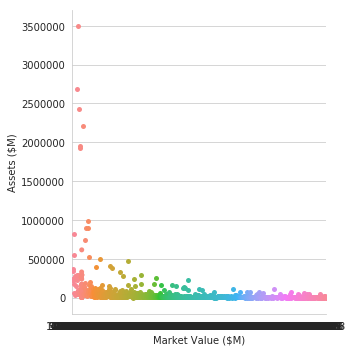

In [24]:
sns.catplot(x="Market Value ($M)", y="Assets ($M)",kind='swarm', data=df[df["Year"]==2020], aspect=1);

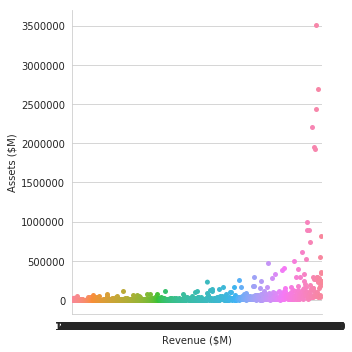

In [39]:
sns.catplot(x="Revenue ($M)", y="Assets ($M)",kind='swarm', data=df[df["Year"]==2020], aspect=1);

# Modelling prep

In [25]:
df.head(2)

,Rank,Name,Revenue ($M),Revenue % change,Profit ($M),Profit % change,Assets ($M),Market Value ($M),Employees,Change in rank (1000),Change in rank (500),Year
0,1,Walmart,485873.0,0.8,13643,-7.2,198825.0,218619,2300000,0,0,2017
1,2,Berkshire Hathaway,223604.0,6.1,24074,0,620854.0,411035,367700,2,2,2017


In [152]:
df.describe()

,Rank,Revenue ($M),Profit ($M),Assets ($M),Market Value ($M),Employees
count,4000.000000,4000.000000,3992.000000,4.000000e+03,3.781000e+03,4.000000e+03
mean,500.497500,14803.662700,1172.706814,4.684214e+04,2.564945e+04,3.394210e+04
std,288.711537,32078.126487,3698.726168,2.018646e+05,6.945020e+04,9.109079e+04
min,1.000000,1791.000000,-22355.000000,3.850000e+02,8.000000e-01,5.100000e+01
25%,250.750000,3013.675000,102.225000,3.569125e+03,2.589100e+03,6.400000e+03
50%,500.500000,5442.000000,333.550000,8.365200e+03,7.474000e+03,1.274500e+04
75%,750.250000,12161.225000,970.550000,2.465230e+04,2.064970e+04,2.938400e+04
max,1000.000000,523964.000000,81417.000000,3.503319e+06,1.199550e+06,2.300000e+06


In [258]:
dfPlot = df[(df['Year']== 2019) & (df['Employees'] < 80000) & (df['Profit ($M)'] > -10000)]

In [260]:
dfPlot = dfPlot.dropna()

In [261]:
dfPlot.shape

(860, 12)

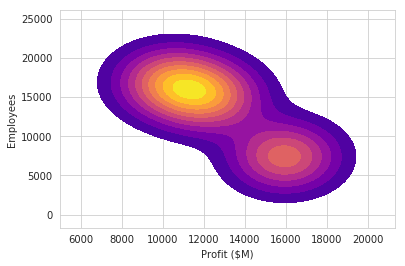

In [136]:
sns.kdeplot( dfPlot['Profit ($M)'], dfPlot['Employees'],
                 cmap="plasma", shade=True, shade_lowest=False)

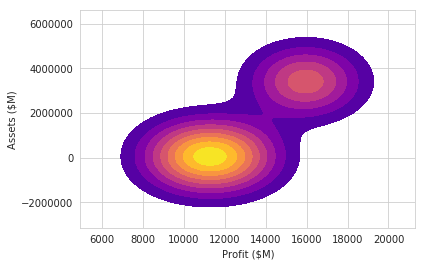

In [145]:
sns.kdeplot( dfPlot['Profit ($M)'], dfPlot['Assets ($M)'],
                 cmap="plasma", shade=True, shade_lowest=False)

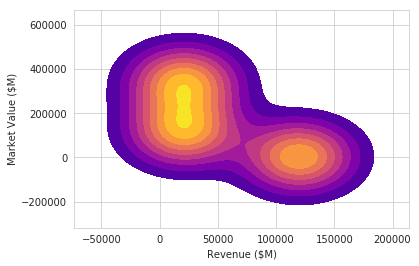

In [143]:
sns.kdeplot( dfPlot['Revenue ($M)'], dfPlot['Market Value ($M)'],
                 cmap="plasma", shade=True, shade_lowest=False)

## Support Vector Machine

In [146]:
from sklearn.model_selection import train_test_split

In [292]:
X.describe()

,Revenue ($M),Profit ($M),Market Value ($M),Employees
count,860.000000,860.000000,860.000000,860.00000
mean,9973.998953,839.778488,17631.757326,17758.07907
std,19009.980711,1952.748165,34920.730170,17436.80563
min,1955.500000,-6917.900000,12.900000,170.00000
25%,2931.825000,114.750000,2590.075000,6175.00000
50%,4956.750000,333.900000,7040.950000,11643.00000
75%,10160.325000,862.525000,18431.825000,23000.00000
max,290212.000000,22112.000000,475731.600000,78500.00000


In [357]:
X = dfPlot.drop(['Rank', 'Name', 'Revenue % change','Profit % change', 'Change in rank (1000)', 'Change in rank (500)', 'Year', 'Assets ($M)'],axis=1)
y = dfPlot['Rank']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)

In [358]:
from sklearn.linear_model import LinearRegression

In [359]:
lm = LinearRegression()

In [360]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [361]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

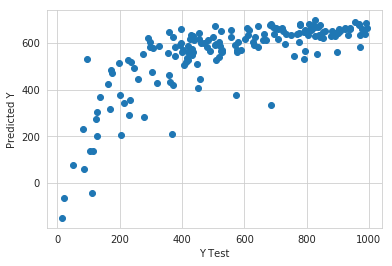

In [362]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [363]:
from sklearn import metrics
import numpy as np

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 157.22735305151704
MSE: 34509.84011759205
RMSE: 185.76824302768236


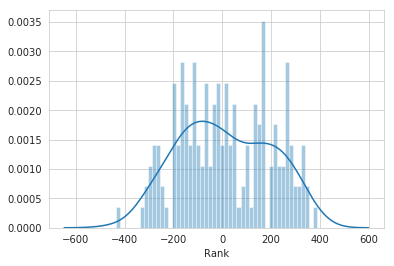

In [364]:
sns.distplot((y_test-predictions),bins=50);

In [365]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Revenue ($M),-0.004018
Profit ($M),-0.015072
Market Value ($M),-0.000422
Employees,-0.005835
